# EPSY 5122: Programming for Social Science Researchers
## Assignment 11
### Due Wednesday, December 1 by 2:30pm

#### Problem 0

If you've made it to this document, you likely already did Problem 0 from the readme.  But just in case, here it is again!

a) Let's watch some videos! I recommend all the videos in this series (for future learning), but we will just focus on two now. Watch the first half of this video (https://www.youtube.com/watch?v=_NrSWLQsDL4&list=PLRqwX-V7Uu6ZF9C0YMKuns9sLDzK6zoiV&index=3) -- just the part about forking, you can ignore pull requests!  Then watch this video:
https://www.youtube.com/watch?v=yXT1ElMEkW8&list=PLRqwX-V7Uu6ZF9C0YMKuns9sLDzK6zoiV&index=6 (you don't have to do the terminal git commands, you can use the clone strategy we used in class)

b) Using what you learned in 0a, **fork** my GitHub repository (remote repo) to your own account, then **clone** to your hard drive (local repo) using GitKraken (or use the command-line if you want the extra challenge).  After finishing EACH problem below, make sure to STAGE and COMMIT with a comment (e.g., "Just finished Part 1! Git is fun!" or whatever).  Then PUSH back to GitHub.

###### Note on privacy!

By default, GitHub repos are public (promoting open source sharing of code), but of course you are more than welcome to make your code for this assignment private, as is your right!  Unfortunately, it's a little bit complicated because GitKraken recently made a change that the free version of their software doesn't allow for private repo access, and you need the paid version.  So here are 3 ways to do this privately:

1) GitKraken partners with GitHub to provide a free pack of resources (including the pro version of GitKraken) for *students*.  That's you!  So you can sign up here *only if you want to do this*: https://education.github.com/pack?utm_source=github+gitkraken

2) Just keep your GitHub repo public while you're working on this project.  Use free GitKraken.  Then switch the GitHub repo to Private only when you're done using GitKraken to push to GitHub.

3) Keep the repo private and use the terminal git commands in the YouTube video for Problem 0a.

To make the repo private:
On your GitHub repo, go to Settings > Manage Access > Manage (under Public Repository) > Change Visibility.  Then add me (jkbye) as a 'collaborator' so I can see it: Settings > Manage Access > Invite a Collaborator (green button) > add 'jkbye'.

#### Problem 1

Now let's get to Jupyter!

a) Import any helpful libraries in this Jupyter Notebook.

b) Load the *MA_Public_Schools_2017.csv* file as a pandas data frame.  Note: these data are from Kaggle: https://www.kaggle.com/ndalziel/massachusetts-public-schools-data and I have already removed a lot of columns.

c) Adapt the example code in the chunk below to replace all spaces in column names with underscores. This is good practice in order to not cause problems with functions that don't allow spaces in variable names (e.g., **smf.ols**).

d) Adapt the code from 1c to replace "%" sign with "Perc", because it is also good practice not to start column names with symbols.

e) Find the descriptives for numeric columns.

f) Commit your changes and push to GitHub!

In [122]:
# Problem 1 code here (can split into multiple code chunks if you want)

#1a 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

#1b
ma_schools = pd.read_csv('MA_Public_Schools_2017.csv')

#1c 
# starter code for 1c -- replace school_data w/ your dataframe name
ma_schools.columns = ma_schools.columns.str.replace(' ', '_') # notice this replaces the 1st argument w/ the 2nd

#1d 
ma_schools.columns = ma_schools.columns.str.replace('%', 'Perc')

#1e 
lang = (ma_schools[['Perc_First_Language_Not_English', 'Perc_English_Language_Learner']].describe().transpose())
print(lang)

needs = (ma_schools[['Perc_Students_With_Disabilities', 'Perc_High_Needs', 'Perc_Economically_Disadvantaged']].describe().transpose())
print(needs)

race = (ma_schools[['Perc_African_American', 'Perc_Asian', 'Perc_Hispanic', 'Perc_White', 'Perc_Native_American', 'Perc_Native_Hawaiian,_Pacific_Islander', 'Perc_Multi-Race,_Non-Hispanic']].describe().transpose())
print(race)

gender = (ma_schools[['Perc_Females', 'Perc_Males']].describe().transpose())
print(gender)
                    
number = (ma_schools[['Number_of_Students']].describe().transpose())   
print(number)

financials = (ma_schools[['Average_Salary', 'Salary_Totals', 'FTE_Count','In-District_Expenditures', 'Total_In-district_FTEs', 'Average_In-District_Expenditures_per_Pupil', 'Total_Expenditures', 'Total_Pupil_FTEs','Average_Expenditures_per_Pupil']].describe().transpose())
print(financials)

                    

                                  count       mean        std  min  25%   50%  \
Perc_First_Language_Not_English  1850.0  18.548270  20.031040  0.0  3.2  10.5   
Perc_English_Language_Learner    1850.0   9.548432  13.163096  0.0  0.9   3.6   

                                  75%    max  
Perc_First_Language_Not_English  27.9  100.0  
Perc_English_Language_Learner    13.2   82.9  
                                  count       mean        std  min     25%  \
Perc_Students_With_Disabilities  1850.0  18.223676  11.462500  0.0  12.900   
Perc_High_Needs                  1850.0  46.616216  22.966461  0.0  27.400   
Perc_Economically_Disadvantaged  1850.0  31.816649  22.409908  0.0  12.825   

                                  50%     75%    max  
Perc_Students_With_Disabilities  16.1  20.000  100.0  
Perc_High_Needs                  41.2  64.975  100.0  
Perc_Economically_Disadvantaged  25.9  47.800   94.4  
                                         count       mean        std  min  \
Perc_

#### Problem 2

a) Remove the District Code column.

b) Create a new column called "TOTAL_Enrollment" that is the sum of all columns that end in "Enrollment".

c) Compute the mean of "TOTAL_Enrollment" for each District. (Hint: groupby)

d) Commit your changes and push to GitHub!

In [73]:
#2a
ma_schools = ma_schools.drop('District_Code', axis=1)

#2b 
enrollment = ma_schools[['PK_Enrollment', 'K_Enrollment', '1_Enrollment', '2_Enrollment', '3_Enrollment', '4_Enrollment', '5_Enrollment', '6_Enrollment', '7_Enrollment', '8_Enrollment', '9_Enrollment', '10_Enrollment', '11_Enrollment', '12_Enrollment']]
ma_schools['TOTAL_Enrollment'] = enrollment.sum(axis =1)
print(ma_schools)

#2c
ma_schools.groupby('District_Name')['TOTAL_Enrollment'].mean()


District_Name
Abby Kelley Foster Charter Public (District)            1425.000000
Abington                                                 382.400000
Academy Of the Pacific Rim Charter Public (District)     527.000000
Acton-Boxborough                                         620.777778
Acushnet                                                 477.500000
                                                           ...     
Winthrop                                                 492.750000
Woburn                                                   420.727273
Worcester                                                564.622222
Worthington                                               60.000000
Wrentham                                                 515.500000
Name: TOTAL_Enrollment, Length: 410, dtype: float64

#### Problem 3

a) Visualize each bivariate relationship among Average_Class_Size, Average_Salary, Perc_Economically_Disadvantaged, and Perc_English_Language_Learner.  Use the Seaborn function **pairplot**.  The argument to `pairplot` should be `school_data[['Average_Class_Size', 'Average_Salary', 'Perc_Economically_Disadvantaged', 'Perc_English_Language_Learner']]`, which will just pull those columns out from the full data frame.

b) Describe what you see from the plots.

c) Based on your observations from 3b, and as a completely post-hoc, exploratory analysis, choose one of the 4 measures from 3a to be an outcome variable, and a second measure to be a predictor variable.  Then run a linear regression, print the *summary*, and write a sentence interpreting the results (does not need to be detailed, just practice retrieving the relevant info on predictor significance, etc.)

d) Commit your changes and push to GitHub!

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Perc_Economically_Disadvantaged   R-squared:                       0.367
Model:                                         OLS   Adj. R-squared:                  0.367
Method:                              Least Squares   F-statistic:                     1074.
Date:                             Wed, 01 Dec 2021   Prob (F-statistic):          4.78e-186
Time:                                     19:50:15   Log-Likelihood:                -7953.4
No. Observations:                             1850   AIC:                         1.591e+04
Df Residuals:                                 1848   BIC:                         1.592e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        21.9623      0.512     42.887      0.000      20.958      22.967
Perc_English_Language_Learner     1.0320      0.031     32.766      0.000       0.970       1.094
==============================================================================
Omnibus:                      154.282   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.562
Skew:                           0.742   Prob(JB):                     5.64e-43
Kurtosis:                       3.568   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

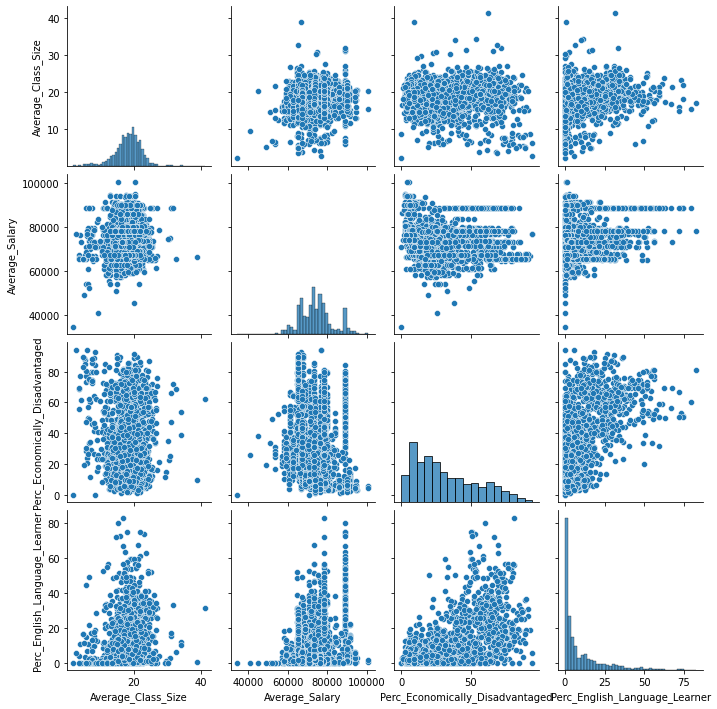

In [133]:
#3a 
sns.pairplot(ma_schools[['Average_Class_Size', 'Average_Salary', 'Perc_Economically_Disadvantaged', 'Perc_English_Language_Learner']])

#3b
#There doesn't really seem to be strong relationships between any of these variables. There may be small correlations of interest
#between the variables and English language learners, but this may be due to the skewed distribution of percentage of English language 
#learners showing very few of those students. 

#3c
# I want to explore being an English language learner as a predictor of being Economically Disadvantaged.
lm = smf.ols(formula = "Perc_Economically_Disadvantaged ~ Perc_English_Language_Learner", data = ma_schools).fit()
lm.summary()
                    
#This linear regression shows that being an English language learner significantly predicts being economically disadvantaged (p < 0.001). 


#### Problem 4

a) Create a new linear regression model that takes the model from 3c and adds both of the remaining variables from 3a as additional predictor variables.  To do this, the formula interface would look like `"outcome_name ~ predictor1_name + predictor2_name + predictor3_name"`

b) Print the summary from 4a, and write a short interpretation of the results, especially comparing it to Problem 3c.  

c) Add School_Type as another predictor to your model.  Interpret the new predictor in your output.  How is it different from the other predictors?

d) Commit your changes and push to GitHub!

In [138]:
#4a 
lm2 = smf.ols(formula = "Perc_Economically_Disadvantaged ~ Perc_English_Language_Learner +  Average_Class_Size + Average_Salary", data = ma_schools).fit()

#4b 
lm2.summary()
#This linear regression model shows that our three predictors significantly predict being economically disadvantaged (p < 0.001)
#and this model is slightly better fitting than the one-predictor model (lower AIC). 

#4c 
lm3 = smf.ols(formula = "Perc_Economically_Disadvantaged ~ Perc_English_Language_Learner +  Average_Class_Size + Average_Salary + School_Type", data = ma_schools).fit()
lm3.summary()
#School Type is categorical and consists of strings. The other variables were numeric. It did not really change my model, which is still significant (p < 0.001). 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Perc_Economically_Disadvantaged   R-squared:                       0.485
Model:                                         OLS   Adj. R-squared:                  0.484
Method:                              Least Squares   F-statistic:                     545.8
Date:                             Wed, 01 Dec 2021   Prob (F-statistic):          6.63e-250
Time:                                     19:56:12   Log-Likelihood:                -7321.7
No. Observations:                             1743   AIC:                         1.465e+04
Df Residuals:                                 1739   BIC:                         1.467e+04
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        47.7140      2.003     23.820      0.000      43.785      51.643
School_Type[T.Public School]     47.7140      2.003     23.820      0.000      43.785      51.643
Perc_English_Language_Learner     1.2184      0.031     39.561      0.000       1.158       1.279
Average_Class_Size               -0.9700      0.101     -9.590      0.000      -1.168      -0.772
Average_Salary                   -0.0008   5.06e-05    -15.425      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      107.218   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.436
Skew:                           0.584   Prob(JB):                     1.06e-29
Kurtosis:                       3.686   Cond. No.                     6.16e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.55e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Problem 5

a) Save this Jupyter notebook as an HTML file (File > Download As > HTML) into your local repository (this folder). By default, Jupyter may put your HTML file in your default Downloads folder (wherever that is) -- if that happens, just manually move the file into this repo folder.

b) Stage, commit, and push all changes to your GitHub repository.

c) Submit a link to your repository as your submission for the assignment on Canvas. Remember the note from Problem 0: you can keep your repo private and add me as a collaborator.